In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import os

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
auctions_data = pd.read_excel("raw_auctions_data.xlsx")

In [5]:
# The data set shape
print(f"The data set contains {auctions_data.shape[0]} records")
print(f"The data set contains {auctions_data.shape[1]} features")

The data set contains 1551 records
The data set contains 19 features


In [6]:
auctions_data.head().T

,0,1,2,3,4
title,Apple iPhone 12 Pro Max - 256GB - Gold (Unlocked),Apple iPhone 12 Pro Max - 256GB-Graphite (with...,Apple iPhone 12 Pro Max - 256GB - Gold (Unlocked),Apple iPhone 12 Pro Max - 256GB - Graphite (Un...,Apple iPhone 12 Pro Max Blacklisted AT&T 256GB
condition,Used,Used,Open box,Used,Used
conditionDescription,NaN,NaN,NaN,NaN,NaN
ended_time,2022-03-16 06:05:00,2022-03-16 07:57:00,2022-03-16 02:59:00,2022-03-16 21:34:00,2022-03-16 18:28:00
ended_time_weekday,2,2,2,2,2
ended_time_weekend,0,0,0,0,0
price,US $770.00,EUR 725.00,GBP 720.00,US $990.00,US $670.00
price_dkk,5185,5394,6386,6667,4512
seller_location,"Hendersonville, North Carolina, United States","Stadthagen, Germany","Chelmsford, United Kingdom","Bonita, California, United States","Oakland, California, United States"
seller_country,United States,Germany,United Kingdom,United States,United States


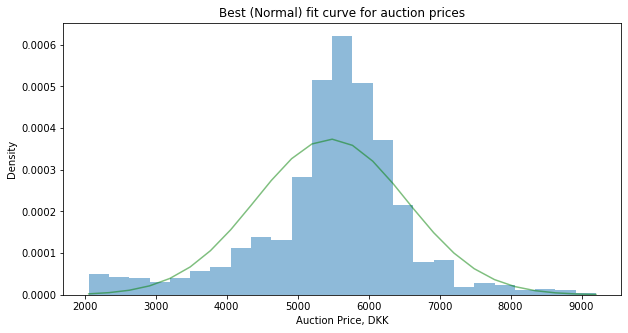

In [7]:
# Plotting the sample data on histogram and getting the bins
dt = auctions_data.price_dkk
dt = auctions_data[(auctions_data.price_dkk < 10000) & (auctions_data.price_dkk > 2000)].price_dkk

_, bins, _ = plt.hist(dt, 25, density=1, alpha=0.5)

# Getting the mean and standard deviation of the sample data dt
mn, std = scipy.stats.norm.fit(dt)

# Getting the best fit curve y values against the x data, bins
y_curve = scipy.stats.norm.pdf(bins, mn, std)

# Plotting the best fit curve
plt.plot(bins, y_curve, 'k', alpha=0.5, color="green")

plt.title('Best (Normal) fit curve for auction prices')
plt.xlabel('Auction Price, DKK')
plt.ylabel('Density')
plt.show()

In [8]:
auctions_data["hasItemDesc"] = (auctions_data.conditionDescription.isna() == False).astype(int)

# Quick hypotheses checks

In [9]:
# Ensure prices can be compared
condition = "Used"

d = auctions_data[auctions_data.condition == condition]

# The data set shape
print(f"The data set contains {d.shape[0]} records")
print(f"The data set contains {d.shape[1]} features")

The data set contains 1165 records
The data set contains 20 features


### Check price differences in categorical variables

In [11]:
def group_by_column(data, groupby_col, out_col):
    return d.groupby(groupby_col).agg(mean_price=(out_col, 'mean'), 
                                      median=(out_col, 'median'),
                                      count=(out_col, 'count'))

In [12]:
group_by_column(d, "hasItemDesc", "price_dkk")

,mean_price,median,count
hasItemDesc,,,
0,5518.755063,5578,1037
1,5531.039062,5511,128


In [13]:
group_by_column(d, "ended_time_weekday", "price_dkk")

,mean_price,median,count
ended_time_weekday,,,
0,5555.760234,5588,171
1,5473.207407,5522,135
2,5466.587838,5522,148
3,5869.774436,5618,133
4,5520.823899,5654,159
5,5381.296970,5499,165
6,5458.834646,5553,254


In [14]:
group_by_column(d, "ended_time_weekend", "price_dkk")

,mean_price,median,count
ended_time_weekend,,,
0,5571.667560,5590,746
1,5428.300716,5542,419


In [15]:
group_by_column(d, "seller_country", "price_dkk").sort_values("mean_price", ascending=False)

,mean_price,median,count
seller_country,,,
Hong Kong,6286.333333,6196.0,3
Canada,6212.200000,6141.0,5
Italy,5766.478261,5804.0,23
Australia,5725.235955,5857.0,89
Sri Lanka,5655.000000,5655.0,1
Puerto Rico,5585.333333,5553.0,3
Denmark,5561.250000,5561.0,4
United Kingdom,5542.923636,5733.0,275
Spain,5541.600000,5467.0,5


### Scatter plots on price variable 

In [17]:
def best_fitting_line(X, y, k=1):
    """ Find best fitting line """
    
    theta = np.polyfit(X, y, k)
    poly_obj = np.poly1d(theta)

    lin = np.linspace(X.min(), X.max(), len(X))
    y_line = poly_obj(lin)
    return lin, y_line

**Interquartile Ranges**

In [19]:
y = d.price_dkk
q1, q2, q3 = np.percentile(y, [25, 50, 75])
alpha = 1.5
IQR = q3 - q1

d = d[(d.price_dkk > (q1 - alpha * IQR)) & (d.price_dkk < (q3 + alpha * IQR)) ]
y = d.price_dkk

In [20]:
def plot_hypothesis(X, y):
    
    # Remove NaNs
    y = y[X.isna() == False]
    X = X[X.isna() == False]

    k = 1
    lin, fitting_line = best_fitting_line(X, y, k)

    plt.scatter(X, y, label='auctions')
    plt.plot(lin, fitting_line, '--', color="g", alpha=0.5, label='fitted')
    plt.title("XXX / Price")

    plt.ylabel("Price, DKK")
    # plt.xlabel("Number of bidders")

    plt.legend(loc="upper left")
    plt.show()

In [28]:
"""
X = d.num_bidders
y = d.price_dkk

# Remove NaNs
y = y[X.isna() == False]
X = X[X.isna() == False]
k = 1
lin, fitting_line = best_fitting_line(X, y, k)
"""

'\nX = d.num_bidders\ny = d.price_dkk\n\n# Remove NaNs\ny = y[X.isna() == False]\nX = X[X.isna() == False]\nk = 1\nlin, fitting_line = best_fitting_line(X, y, k)\n'

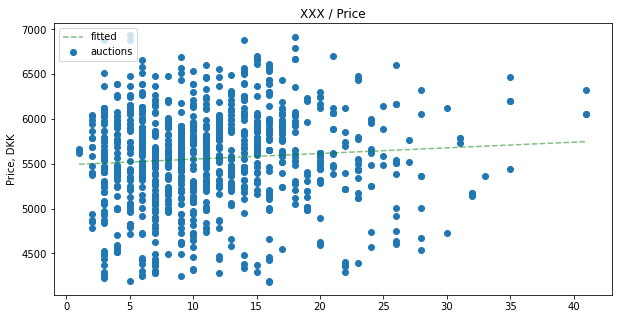

In [22]:
plot_hypothesis(d.num_bidders, d.price_dkk)

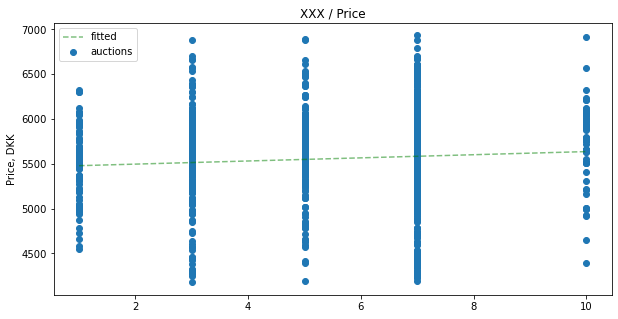

In [23]:
plot_hypothesis(d.duration, d.price_dkk)

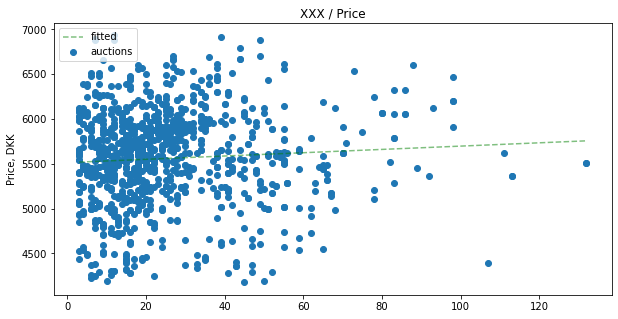

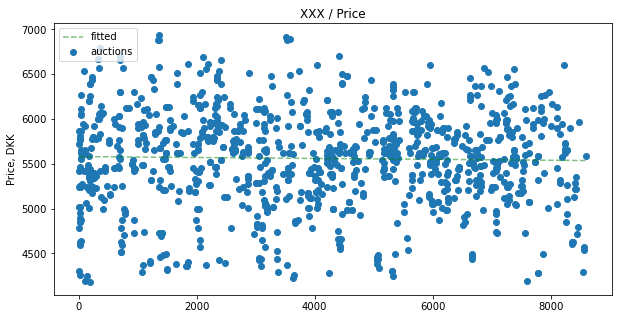

In [25]:
plot_hypothesis(d.seller_member_duration, d.price_dkk)

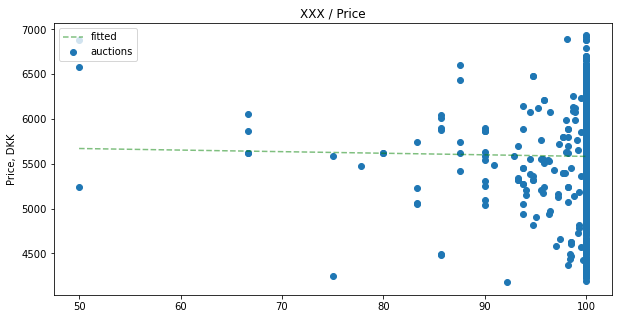

In [29]:
plot_hypothesis(d.seller_feedback_pct, d.price_dkk)

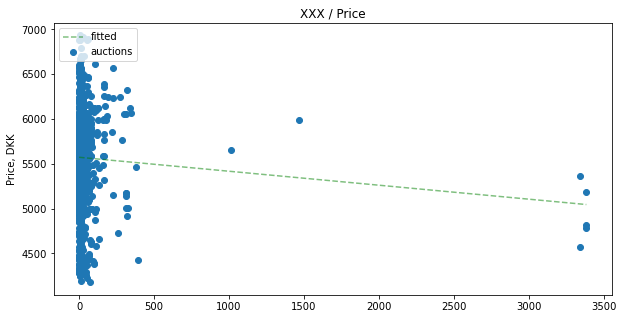

In [30]:
# See paper why this relationship is negative
plot_hypothesis(d.seller_feedback_positive, d.price_dkk)

## Summary statistics

In [34]:
cols = ["condition", "ended_time_weekday", "ended_time_weekend", "price_dkk", "seller_country", "seller_feedback_pct", 
        "seller_feedback_positive", "seller_feedback_neutral", "seller_feedback_negative", "seller_member_duration", 
        "num_bidders", "bids", "duration", "hasItemDesc"]

In [35]:
data = auctions_data.loc[:, cols]

,condition,ended_time_weekday,ended_time_weekend,price_dkk,seller_country,seller_feedback_pct,seller_feedback_positive,seller_feedback_neutral,seller_feedback_negative,seller_member_duration,num_bidders,bids,duration,hasItemDesc
0,Used,2,0,5185,United States,100.0,6.0,0.0,0.0,1967,3,3,7,0
1,Used,2,0,5394,Germany,100.0,27.0,0.0,0.0,3894,2,3,5,0
2,Open box,2,0,6386,United Kingdom,100.0,29.0,0.0,0.0,5631,13,28,7,0
3,Used,2,0,6667,United States,100.0,8.0,0.0,0.0,332,18,44,7,0
4,Used,2,0,4512,United States,100.0,16.0,0.0,0.0,715,4,9,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,Used,6,1,6066,Australia,100.0,5.0,0.0,0.0,5402,17,29,7,0
1547,Used,6,1,5886,Denmark,98.2,60.0,1.0,1.0,7272,21,52,7,1
1548,For parts or not working,6,1,3651,United States,100.0,26.0,0.0,0.0,3922,12,30,7,0
1549,Used,6,1,8791,United States,88.0,22.0,0.0,3.0,4033,43,101,10,1


In [36]:
data = data.groupby(["seller_country"]).filter(lambda x: x.condition.count() > 9)

In [38]:
# Numerical variables
l = data.describe().T.iloc[:, 1:]
l = l.loc[:, ['mean', '50%', 'std', 'min', 'max']]
l

,mean,50%,std,min,max
ended_time_weekday,3.220373,3.0,2.098833,0.0,6.0
ended_time_weekend,0.347537,0.0,0.476346,0.0,1.0
price_dkk,5472.376165,5606.5,1389.356749,416.0,25929.0
seller_feedback_pct,98.513592,100.0,6.176234,20.0,100.0
seller_feedback_positive,157.489244,12.0,1058.895338,0.0,10866.0
seller_feedback_neutral,0.480222,0.0,3.097679,0.0,29.0
seller_feedback_negative,0.358085,0.0,1.685977,0.0,22.0
seller_member_duration,3656.318242,3367.5,2483.677930,6.0,8841.0
num_bidders,10.970706,10.0,6.176653,1.0,43.0
bids,24.934088,20.0,18.509167,3.0,113.0


In [41]:
country = data.groupby(["seller_country"]).count().loc[:, "num_bidders"]
country

seller_country
Australia         106
Germany           222
Italy              37
United Kingdom    394
United States     743
Name: num_bidders, dtype: int64

In [43]:
condition = data.groupby(["condition"]).count().loc[:, "num_bidders"]
condition

condition
For parts or not working     116
New                          107
Open box                     149
Used                        1130
Name: num_bidders, dtype: int64